# Credit Risk Data Overview

This dataset contains client and credit information for risk modeling. Below are the main feature groups and their descriptions:


## Borrower Characteristics
- **customer_id**: Unique identifier for each customer.
- **name**: Customer name.
- **age**: Age of the customer.
- **gender**: Gender (M/F).
- **owns_car**: Whether the customer owns a car (Y/N).
- **owns_house**: Whether the customer owns a house (Y/N).
- **no_of_children**: Number of children.
- **net_yearly_income**: Net yearly income.
- **no_of_days_employed**: Number of days employed.
- **occupation_type**: Type of occupation.
- **total_family_members**: Total number of family members.
- **migrant_worker**: Whether the customer is a migrant worker (1/0).


## Credit & Loan Characteristics
- **yearly_debt_payments**: Yearly debt payments.
- **credit_limit**: Credit limit assigned.
- **credit_limit_used(%)**: Percentage of credit limit used.
- **credit_score**: Credit score value.
- **prev_defaults**: Number of previous defaults.
- **default_in_last_6months**: Default in last 6 months (1/0).


## Target Variable
- **credit_card_default**: Whether the customer defaulted on their credit card (1 = default, 0 = no default).


**Note:**
- The training data is in `train/train.csv` and the test data in `test/test.csv`.
- These features will be used for credit risk prediction and model governance analysis.


In [695]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [696]:
df_train = pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [697]:
df_train.head(10)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
5,CST_123268,Sarah Marsh,46,F,Y,N,0.0,252765.91,2898.0,Accountants,2.0,1.0,37046.86,40245.64,19,937.0,0,0,0
6,CST_127502,Mason,38,M,N,Y,1.0,262389.20,5541.0,High skill tech staff,3.0,0.0,50839.39,41311.08,42,733.0,0,0,0
7,CST_151722,Saba,46,F,Y,Y,1.0,241211.39,1448.0,Core staff,3.0,0.0,30008.46,32209.22,91,906.0,0,0,0
8,CST_133768,Ashutosh,40,F,NaN,Y,0.0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0
9,CST_111670,David Milliken,39,F,Y,Y,2.0,207109.13,2791.0,High skill tech staff,4.0,0.0,9509.10,28425.52,14,666.0,0,0,0


In [698]:
df_test.head(10)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1
5,CST_107341,asil Katz,29,F,N,Y,0.0,145295.56,4794.0,Sales staff,2.0,0.0,40487.68,20346.31,71,720.0,0,0
6,CST_147879,Baker,37,F,N,Y,0.0,144028.05,1069.0,Laborers,1.0,0.0,24609.26,31383.40,29,944.0,0,0
7,CST_156027,Saphir,29,M,N,Y,0.0,126638.58,319.0,Unknown,1.0,0.0,40468.80,25486.65,5,939.0,0,0
8,CST_109067,Sinead Cruise,41,F,N,Y,0.0,81034.46,3012.0,Medicine staff,2.0,0.0,19918.25,13458.33,12,763.0,0,0
9,CST_114556,Conor Humphries,41,M,Y,Y,1.0,102395.81,450.0,Unknown,3.0,1.0,26494.71,24354.25,90,897.0,0,0


### Data Cleaning

In [699]:
df_train.shape

(45528, 19)

In [700]:
for x in df_train['customer_id'].value_counts():
    if x!=1:
        print('yes')

In [701]:
df_train.dtypes

,0
customer_id,object
name,object
age,int64
gender,object
owns_car,object
owns_house,object
no_of_children,float64
net_yearly_income,float64
no_of_days_employed,float64
occupation_type,object


In [702]:
# --- 1. Calculate DTI Ratio ---
# This is a key metric for assessing a borrower's ability to manage payments.
# Formula: yearly_debt_payments / net_yearly_income
df_train['DTI_ratio'] = df_train['yearly_debt_payments'] / df_train['net_yearly_income']
df_test['DTI_ratio'] = df_test['yearly_debt_payments'] / df_test['net_yearly_income']


# --- 2. Calculate Outstanding Balance ---
# This tells you the actual amount of credit the borrower is using.
# Formula: credit_limit * (credit_limit_used(%) / 100)
df_train['outstanding_balance'] = df_train['credit_limit'] * (df_train['credit_limit_used(%)'] / 100)
df_test['outstanding_balance'] = df_test['credit_limit'] * (df_test['credit_limit_used(%)'] / 100)

In [703]:
df_train.head(5)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,...,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,DTI_ratio,outstanding_balance
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,...,1.0,33070.28,18690.93,73,544.0,2,1,1,0.306393,13644.3789
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,...,0.0,15329.53,37745.19,52,857.0,0,0,0,0.139534,19627.4988
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,...,0.0,48416.60,41598.36,43,650.0,0,0,0,0.210367,17887.2948
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,...,0.0,22574.36,32627.76,20,754.0,0,0,0,0.184543,6525.5520
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,...,0.0,38282.95,52950.64,75,927.0,0,0,0,0.098849,39712.9800


In [704]:
# --- Bucketing Credit Scores ---
# Define credit score categories based on common standards
score_bins = [0, 580, 670, 740, 800, float('inf')]
score_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
df_train['credit_score_bucket'] = pd.cut(df_train['credit_score'], bins=score_bins, labels=score_labels, right=False)
df_test['credit_score_bucket'] = pd.cut(df_test['credit_score'], bins=score_bins, labels=score_labels, right=False)

# Display the distribution of credit score buckets
print(df_train['credit_score_bucket'].value_counts())
df_train[['customer_id', 'credit_score', 'credit_score_bucket']].head()

credit_score_bucket
Excellent    20886
Good         10323
Very Good     8345
Fair          4488
Poor          1478
Name: count, dtype: int64


,customer_id,credit_score,credit_score_bucket
0,CST_115179,544.0,Poor
1,CST_121920,857.0,Excellent
2,CST_109330,650.0,Fair
3,CST_128288,754.0,Very Good
4,CST_151355,927.0,Excellent


In [705]:
df_train.dtypes

,0
customer_id,object
name,object
age,int64
gender,object
owns_car,object
owns_house,object
no_of_children,float64
net_yearly_income,float64
no_of_days_employed,float64
occupation_type,object


Binning a continuous variable like age can help the model capture patterns without being influenced by small, noisy variations. We can create age groups.

In [706]:
# Define the age bins and labels
age_bins = [0, 29, 45, 60, float('inf')]
age_labels = ['Young_Adult', 'Middle_Aged', 'Senior_Adult', 'Elderly']
df_train['age_group'] = pd.cut(df_train['age'], bins=age_bins, labels=age_labels, right=False)
df_test['age_group'] = pd.cut(df_test['age'], bins=age_bins, labels=age_labels, right=False)

Log Transform on 'net_yearly_income'

Creating Interaction Features

In [707]:
# --- Feature: Income per Family Member ---
# This might capture financial strain better than raw income.
# We add 1 to the denominator to avoid division by zero if total_family_members is 0.
df_train['income_per_person'] = df_train['net_yearly_income'] / (df_train['total_family_members'] + 1)

# --- Feature: Credit Utilization ---
# This shows how much of their available credit a person is using.
df_train['credit_utilization'] = df_train['credit_limit_used(%)'] / 100

In [708]:
df_train['owns_car'][1]

'N'

In [709]:
df_train['owns_car'] = df_train['owns_car'].map({'Y': 1, 'N': 0})
df_train['owns_house'] = df_train['owns_house'].map({'Y': 1, 'N': 0})
df_train['gender'] = df_train['gender'].map({'M': 1, 'F': 0})


df_test['owns_car'] = df_test['owns_car'].map({'Y': 1, 'N': 0})
df_test['owns_house'] = df_test['owns_house'].map({'Y': 1, 'N': 0})
df_test['gender'] = df_test['gender'].map({'M': 1, 'F': 0})

In [710]:
df_train.isnull().sum()

,0
customer_id,0
name,0
age,0
gender,1
owns_car,547
owns_house,0
no_of_children,774
net_yearly_income,0
no_of_days_employed,463
occupation_type,0


In [711]:
# Justification: People in similar professions likely have similar debt levels.
median_debt_by_occupation = df_train.groupby('occupation_type')['yearly_debt_payments'].transform('median')
df_train['yearly_debt_payments'] = df_train['yearly_debt_payments'].fillna(median_debt_by_occupation)
df_test['yearly_debt_payments'] = df_test['yearly_debt_payments'].fillna(median_debt_by_occupation)

In [712]:
# Justification: Employment duration often varies significantly by profession.
median_employment= df_train.groupby('occupation_type')['no_of_days_employed'].transform('median')
df_train['no_of_days_employed'] = df_train['no_of_days_employed'].fillna(median_employment)
df_test['no_of_days_employed'] = df_test['no_of_days_employed'].fillna(median_employment)

In [713]:
# Justification: These two columns are directly related. Using family size to estimate the number of children is the most logical approach.
median_children = df_train.groupby('total_family_members')['no_of_children'].transform('median')
df_train['no_of_children'] = df_train['no_of_children'].fillna(median_children)
df_test['no_of_children'] = df_test['no_of_children'].fillna(median_children)

In [714]:
median_cars = df_train.groupby('occupation_type')['owns_car'].transform("median")
df_train['owns_car'] = df_train['owns_car'].fillna(median_cars)
df_test['owns_car'] = df_test['owns_car'].fillna(median_cars)

In [715]:
# Fill missing DTI_ratio using the median DTI_ratio within each credit score bucket
median_dti_by_bucket = df_train.groupby('credit_score_bucket')['DTI_ratio'].transform('median')
df_train['DTI_ratio'] = df_train['DTI_ratio'].fillna(median_dti_by_bucket)
df_test['DTI_ratio'] = df_test['DTI_ratio'].fillna(median_dti_by_bucket)

/tmp/ipython-input-3838981117.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_dti_by_bucket = df_train.groupby('credit_score_bucket')['DTI_ratio'].transform('median')


In [716]:
df_train = df_train.dropna().reset_index(drop=True)
df_test = df_test.dropna().reset_index(drop= True)

In [717]:
df_train.isnull().sum()

,0
customer_id,0
name,0
age,0
gender,0
owns_car,0
owns_house,0
no_of_children,0
net_yearly_income,0
no_of_days_employed,0
occupation_type,0


In [718]:
df_train.shape

(45349, 25)

# List of leaky features to drop (update with your actual column names)
Examples of more leaky features
* 'recovery_amount',         # Known only after default
*     'final_loan_balance',      # Known only at loan end
*    'loan_status',             # Known only after loan matures
*    'last_payment_date',       # Known only after payments are made
*    'DPD',                     # Days past due, not known at origination
*   'number_of_payments_made'  # Not known at origination



In [719]:
df_train = df_train.drop(['default_in_last_6months'], axis =1)
df_test = df_test.drop(['default_in_last_6months'], axis =1)

df_train = df_train.drop(['name'], axis =1)
df_test= df_test.drop(['name'], axis =1)

In [720]:
df_train.head(5)

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,...,credit_limit_used(%),credit_score,prev_defaults,credit_card_default,DTI_ratio,outstanding_balance,credit_score_bucket,age_group,income_per_person,credit_utilization
0,CST_115179,46,0.0,0.0,1,0.0,107934.04,612.0,Unknown,1.0,...,73,544.0,2,1,0.306393,13644.3789,Poor,Senior_Adult,53967.020000,0.73
1,CST_121920,29,1.0,0.0,1,0.0,109862.62,2771.0,Laborers,2.0,...,52,857.0,0,0,0.139534,19627.4988,Excellent,Middle_Aged,36620.873333,0.52
2,CST_109330,37,1.0,0.0,1,0.0,230153.17,204.0,Laborers,2.0,...,43,650.0,0,0,0.210367,17887.2948,Fair,Middle_Aged,76717.723333,0.43
3,CST_128288,39,0.0,0.0,1,0.0,122325.82,11941.0,Core staff,2.0,...,20,754.0,0,0,0.184543,6525.5520,Very Good,Middle_Aged,40775.273333,0.20
4,CST_151355,46,1.0,1.0,1,0.0,387286.00,1459.0,Core staff,1.0,...,75,927.0,0,0,0.098849,39712.9800,Excellent,Senior_Adult,193643.000000,0.75


In [721]:
df_train['occupation_type'].unique()

array(['Unknown', 'Laborers', 'Core staff', 'Accountants',
       'High skill tech staff', 'Sales staff', 'Managers', 'Drivers',
       'Medicine staff', 'Cleaning staff', 'HR staff', 'Security staff',
       'Cooking staff', 'Waiters/barmen staff', 'Low-skill Laborers',
       'Private service staff', 'Secretaries', 'Realty agents',
       'IT staff'], dtype=object)

### One Hot Encoding

In [722]:
# drop_first=True removes the first category to prevent multicollinearity.
df_train = pd.get_dummies(df_train, columns=['occupation_type'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['occupation_type'], drop_first=True)

EDA

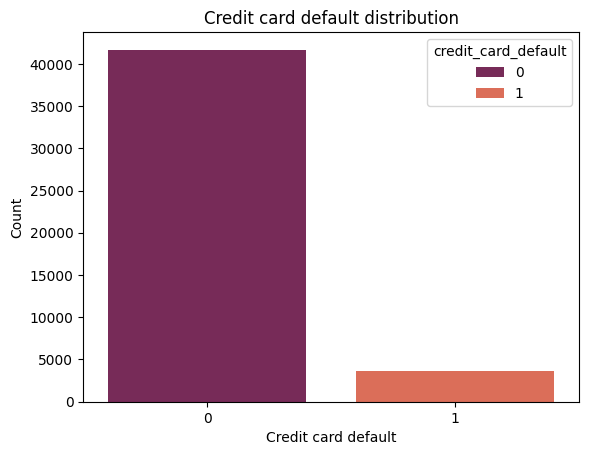

In [723]:
sns.countplot(data=df_train, x='credit_card_default', hue='credit_card_default', palette='rocket')
plt.xlabel('Credit card default')
plt.ylabel('Count')
plt.title('Credit card default distribution')
plt.show()

We can say the target variable is imbalanced. The class '0' may be called the majority class, and '1' the minority class. It may be the reason of bias of our classifier. It is important for the model to give importance also for the minority class to correctly predict both classes. It is important to keep this information in mind while building the model.

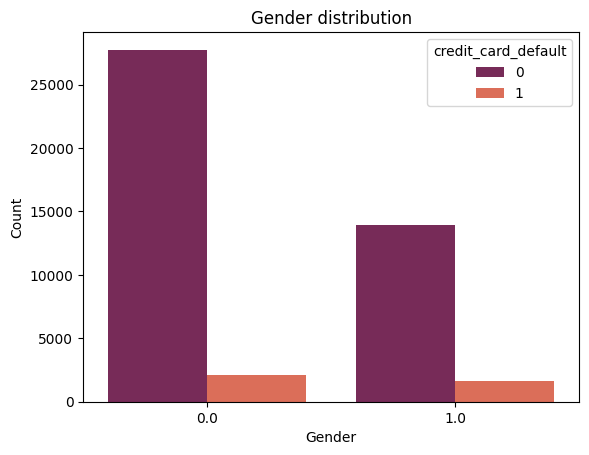

In [724]:
sns.countplot(data=df_train, x='gender', hue='credit_card_default', palette='rocket')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')
plt.show()

The proportion of females and males with credit card default is pretty similar. On the other hand, there are more females in the dataset

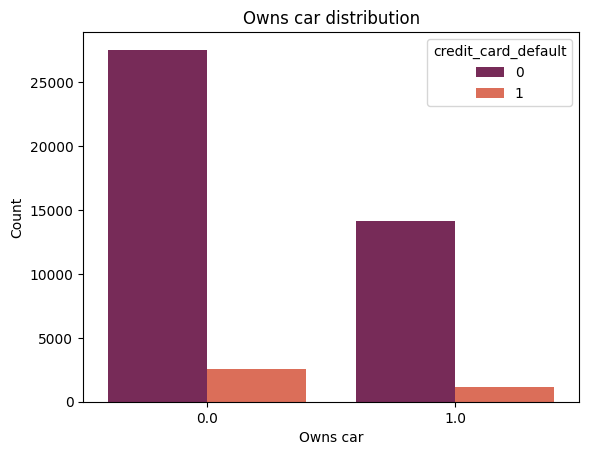

In [725]:
sns.countplot(data=df_train, x='owns_car', hue='credit_card_default', palette='rocket')
plt.xlabel('Owns car')
plt.ylabel('Count')
plt.title('Owns car distribution')
plt.show()

More people do not own a car, and the percentage of car owners and non-car owners with credit card default is similar.

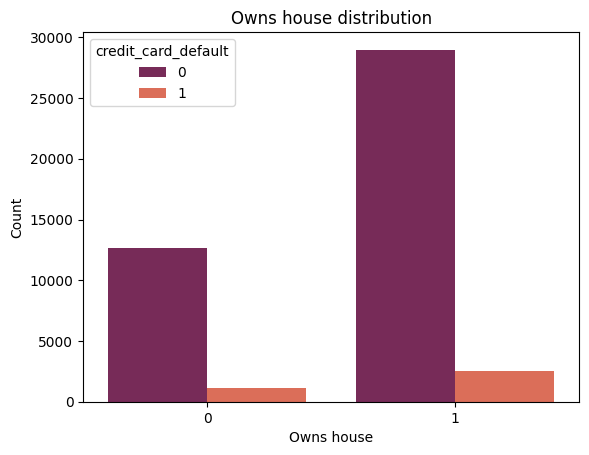

In [726]:
sns.countplot(data=df_train, x='owns_house', hue='credit_card_default', palette='rocket')
plt.xlabel('Owns house')
plt.ylabel('Count')
plt.title('Owns house distribution')
plt.show()

Log Transformation on Income

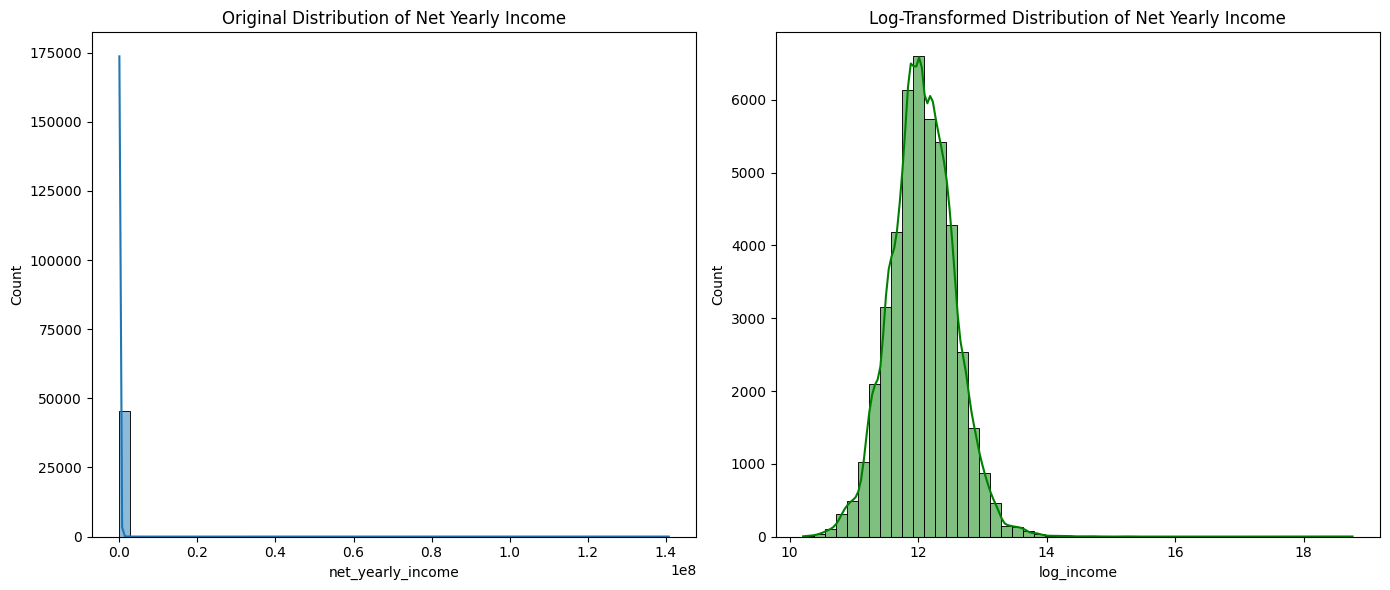

In [727]:
df_train['log_income'] = np.log1p(df_train['net_yearly_income'])
df_test['log_income'] = np.log1p(df_test['net_yearly_income'])

# --- Visualize the transformation ---
plt.figure(figsize=(14, 6))

# Plot Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_train['net_yearly_income'], kde=True, bins=50)
plt.title('Original Distribution of Net Yearly Income')

# Plot Log-Transformed Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_train['log_income'], kde=True, bins=50, color='green')
plt.title('Log-Transformed Distribution of Net Yearly Income')
plt.tight_layout()


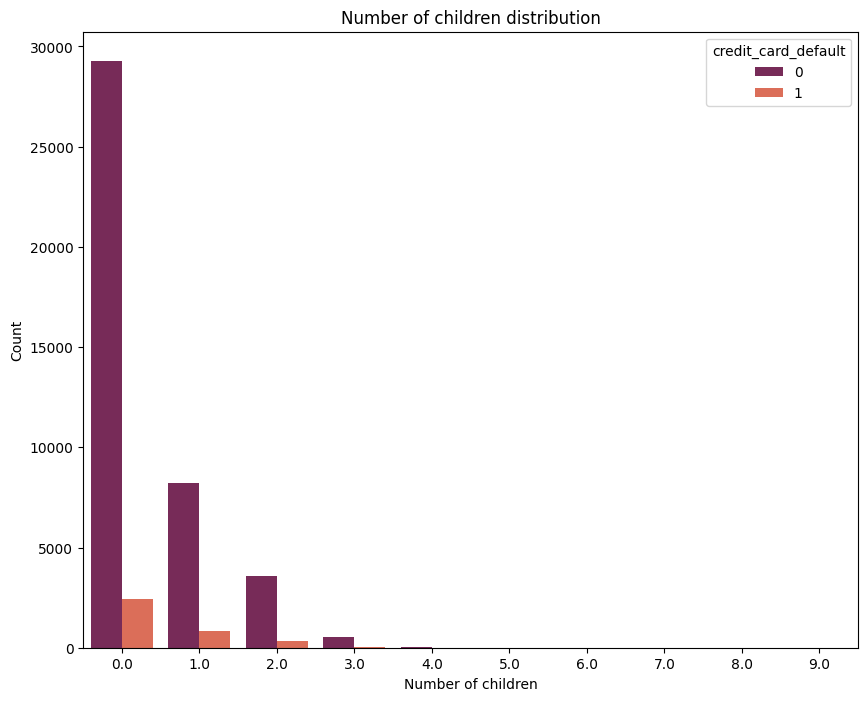

In [728]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_train, x='no_of_children', hue='credit_card_default', palette='rocket')
plt.xlabel('Number of children')
plt.ylabel('Count')
plt.title('Number of children distribution')
plt.show()

More people do not own house, and the percentage of house owners and non-house owners with credit card default is similar.

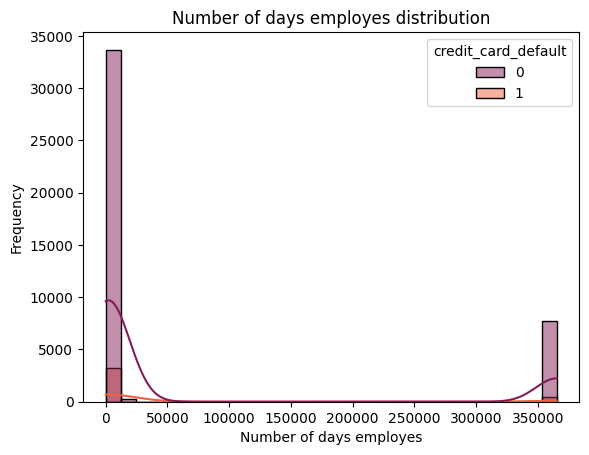

In [729]:
sns.histplot(data=df_train, kde=True, x='no_of_days_employed', hue='credit_card_default', bins=30, palette='rocket')
plt.xlabel('Number of days employes')
plt.ylabel('Frequency')
plt.title('Number of days employes distribution')
plt.show()

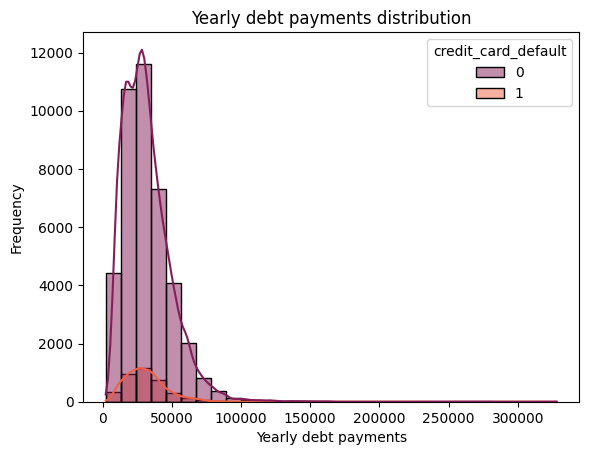

In [730]:
sns.histplot(data=df_train, kde=True, x='yearly_debt_payments', hue='credit_card_default', bins=30, palette='rocket')
plt.xlabel('Yearly debt payments')
plt.ylabel('Frequency')
plt.title('Yearly debt payments distribution')
plt.show()

Log Transformation on yearly Debt payments

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


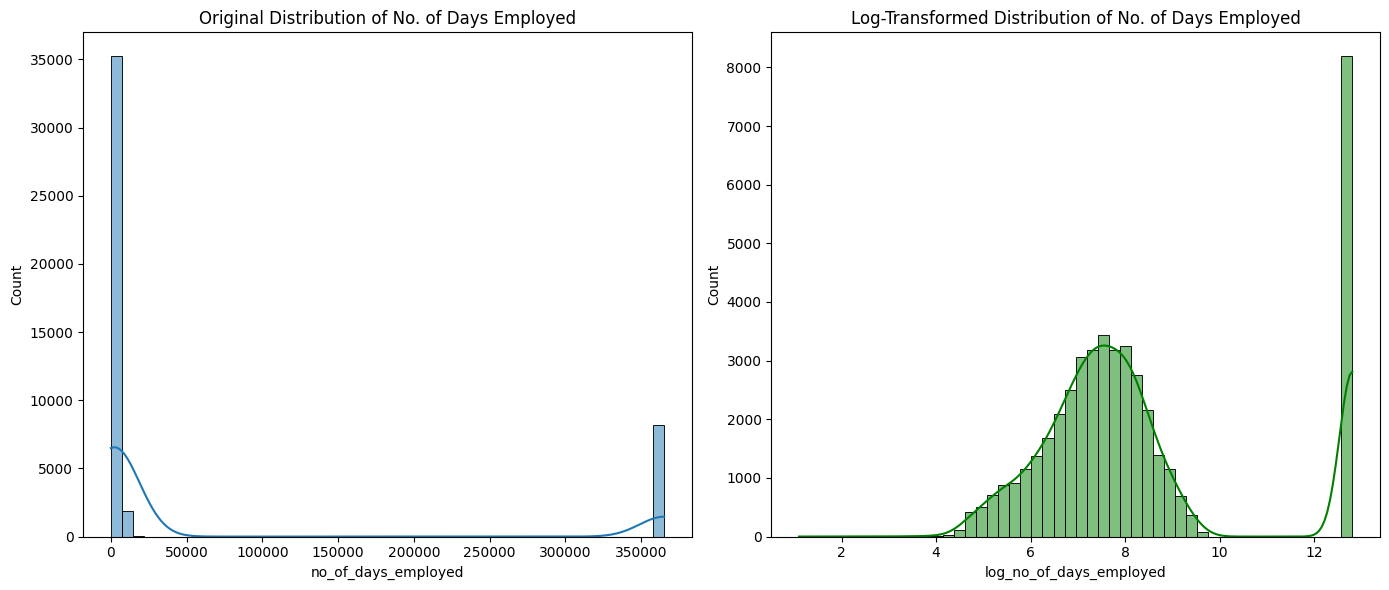

In [731]:
# Apply log1p transformation
df_train['log_no_of_days_employed'] = np.log1p(df_train['no_of_days_employed'])
df_test['log_no_of_days_employed'] = np.log1p(df_test['no_of_days_employed'])

# --- Visualize the transformation ---
plt.figure(figsize=(14, 6))

# Plot Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_train['no_of_days_employed'], kde=True, bins=50)
plt.title('Original Distribution of No. of Days Employed')

# Plot Log-Transformed Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_train['log_no_of_days_employed'], kde=True, bins=50, color='green')
plt.title('Log-Transformed Distribution of No. of Days Employed')

plt.tight_layout()
plt.show()


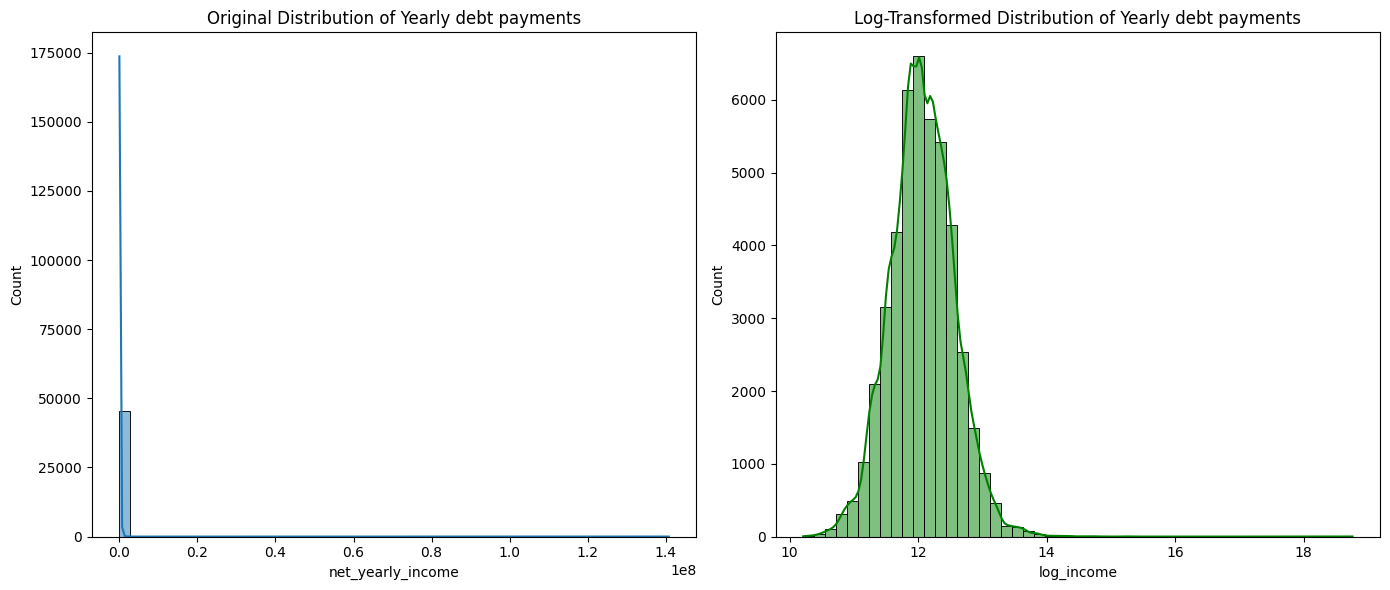

In [732]:
df_train['log_income'] = np.log1p(df_train['net_yearly_income'])
df_test['log_income'] = np.log1p(df_test['net_yearly_income'])

# --- Visualize the transformation ---
plt.figure(figsize=(14, 6))

# Plot Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_train['net_yearly_income'], kde=True, bins=50)
plt.title('Original Distribution of Yearly debt payments')

# Plot Log-Transformed Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_train['log_income'], kde=True, bins=50, color='green')
plt.title('Log-Transformed Distribution of Yearly debt payments')
plt.tight_layout()


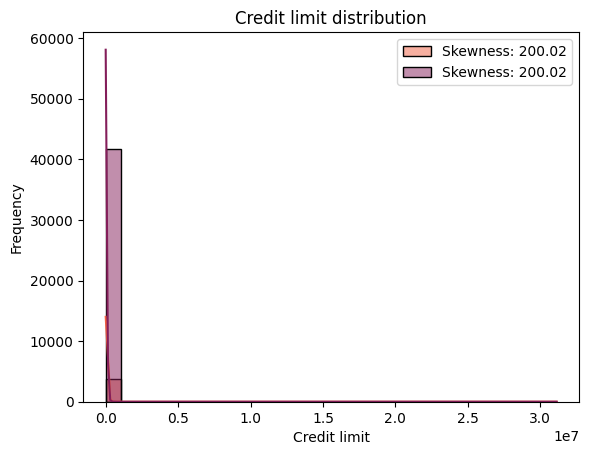

In [733]:
sns.histplot(data= df_train, kde=True, x='credit_limit', bins=30, hue='credit_card_default', palette='rocket', label = 'Skewness: %.2f'%(df_train['credit_limit'].skew()))
plt.xlabel('Credit limit')
plt.ylabel('Frequency')
plt.title('Credit limit distribution')
plt.legend()
plt.show()

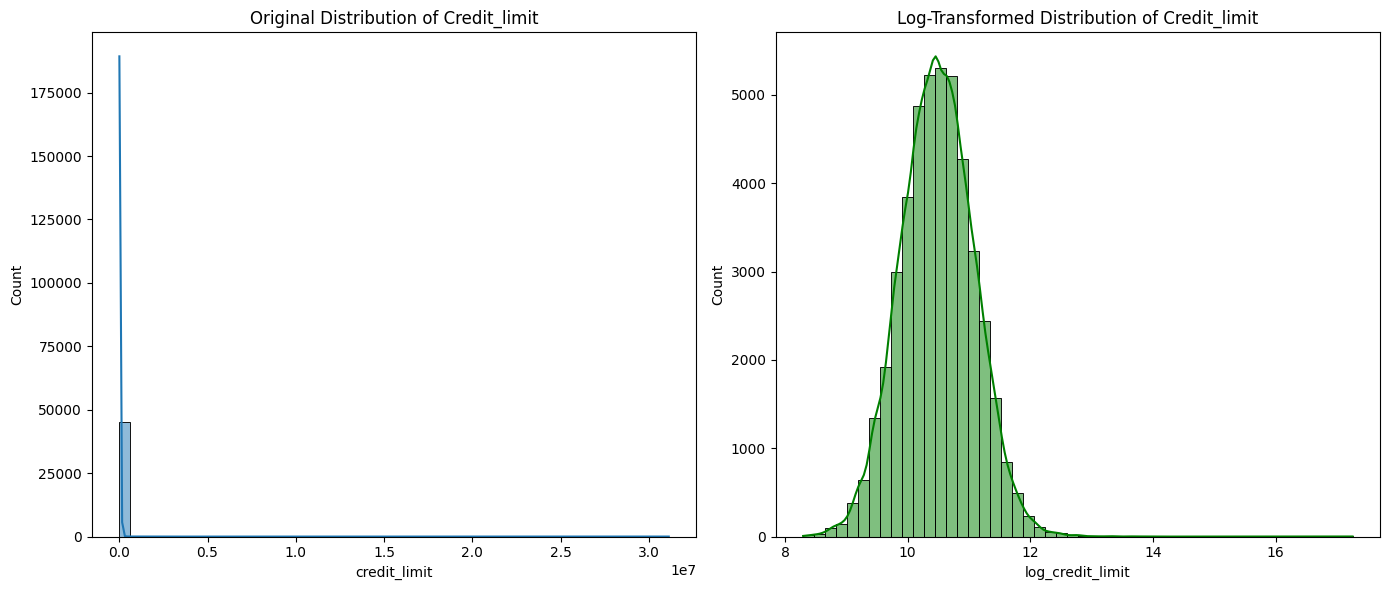

In [734]:
df_train['log_credit_limit'] = np.log1p(df_train['credit_limit'])
df_test['log_credit_limit'] = np.log1p(df_test['credit_limit'])

# --- Visualize the transformation ---
plt.figure(figsize=(14, 6))

# Plot Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_train['credit_limit'], kde=True, bins=50)
plt.title('Original Distribution of Credit_limit')

# Plot Log-Transformed Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_train['log_credit_limit'], kde=True, bins=50, color='green')
plt.title('Log-Transformed Distribution of Credit_limit')
plt.tight_layout()


Outlier Detection

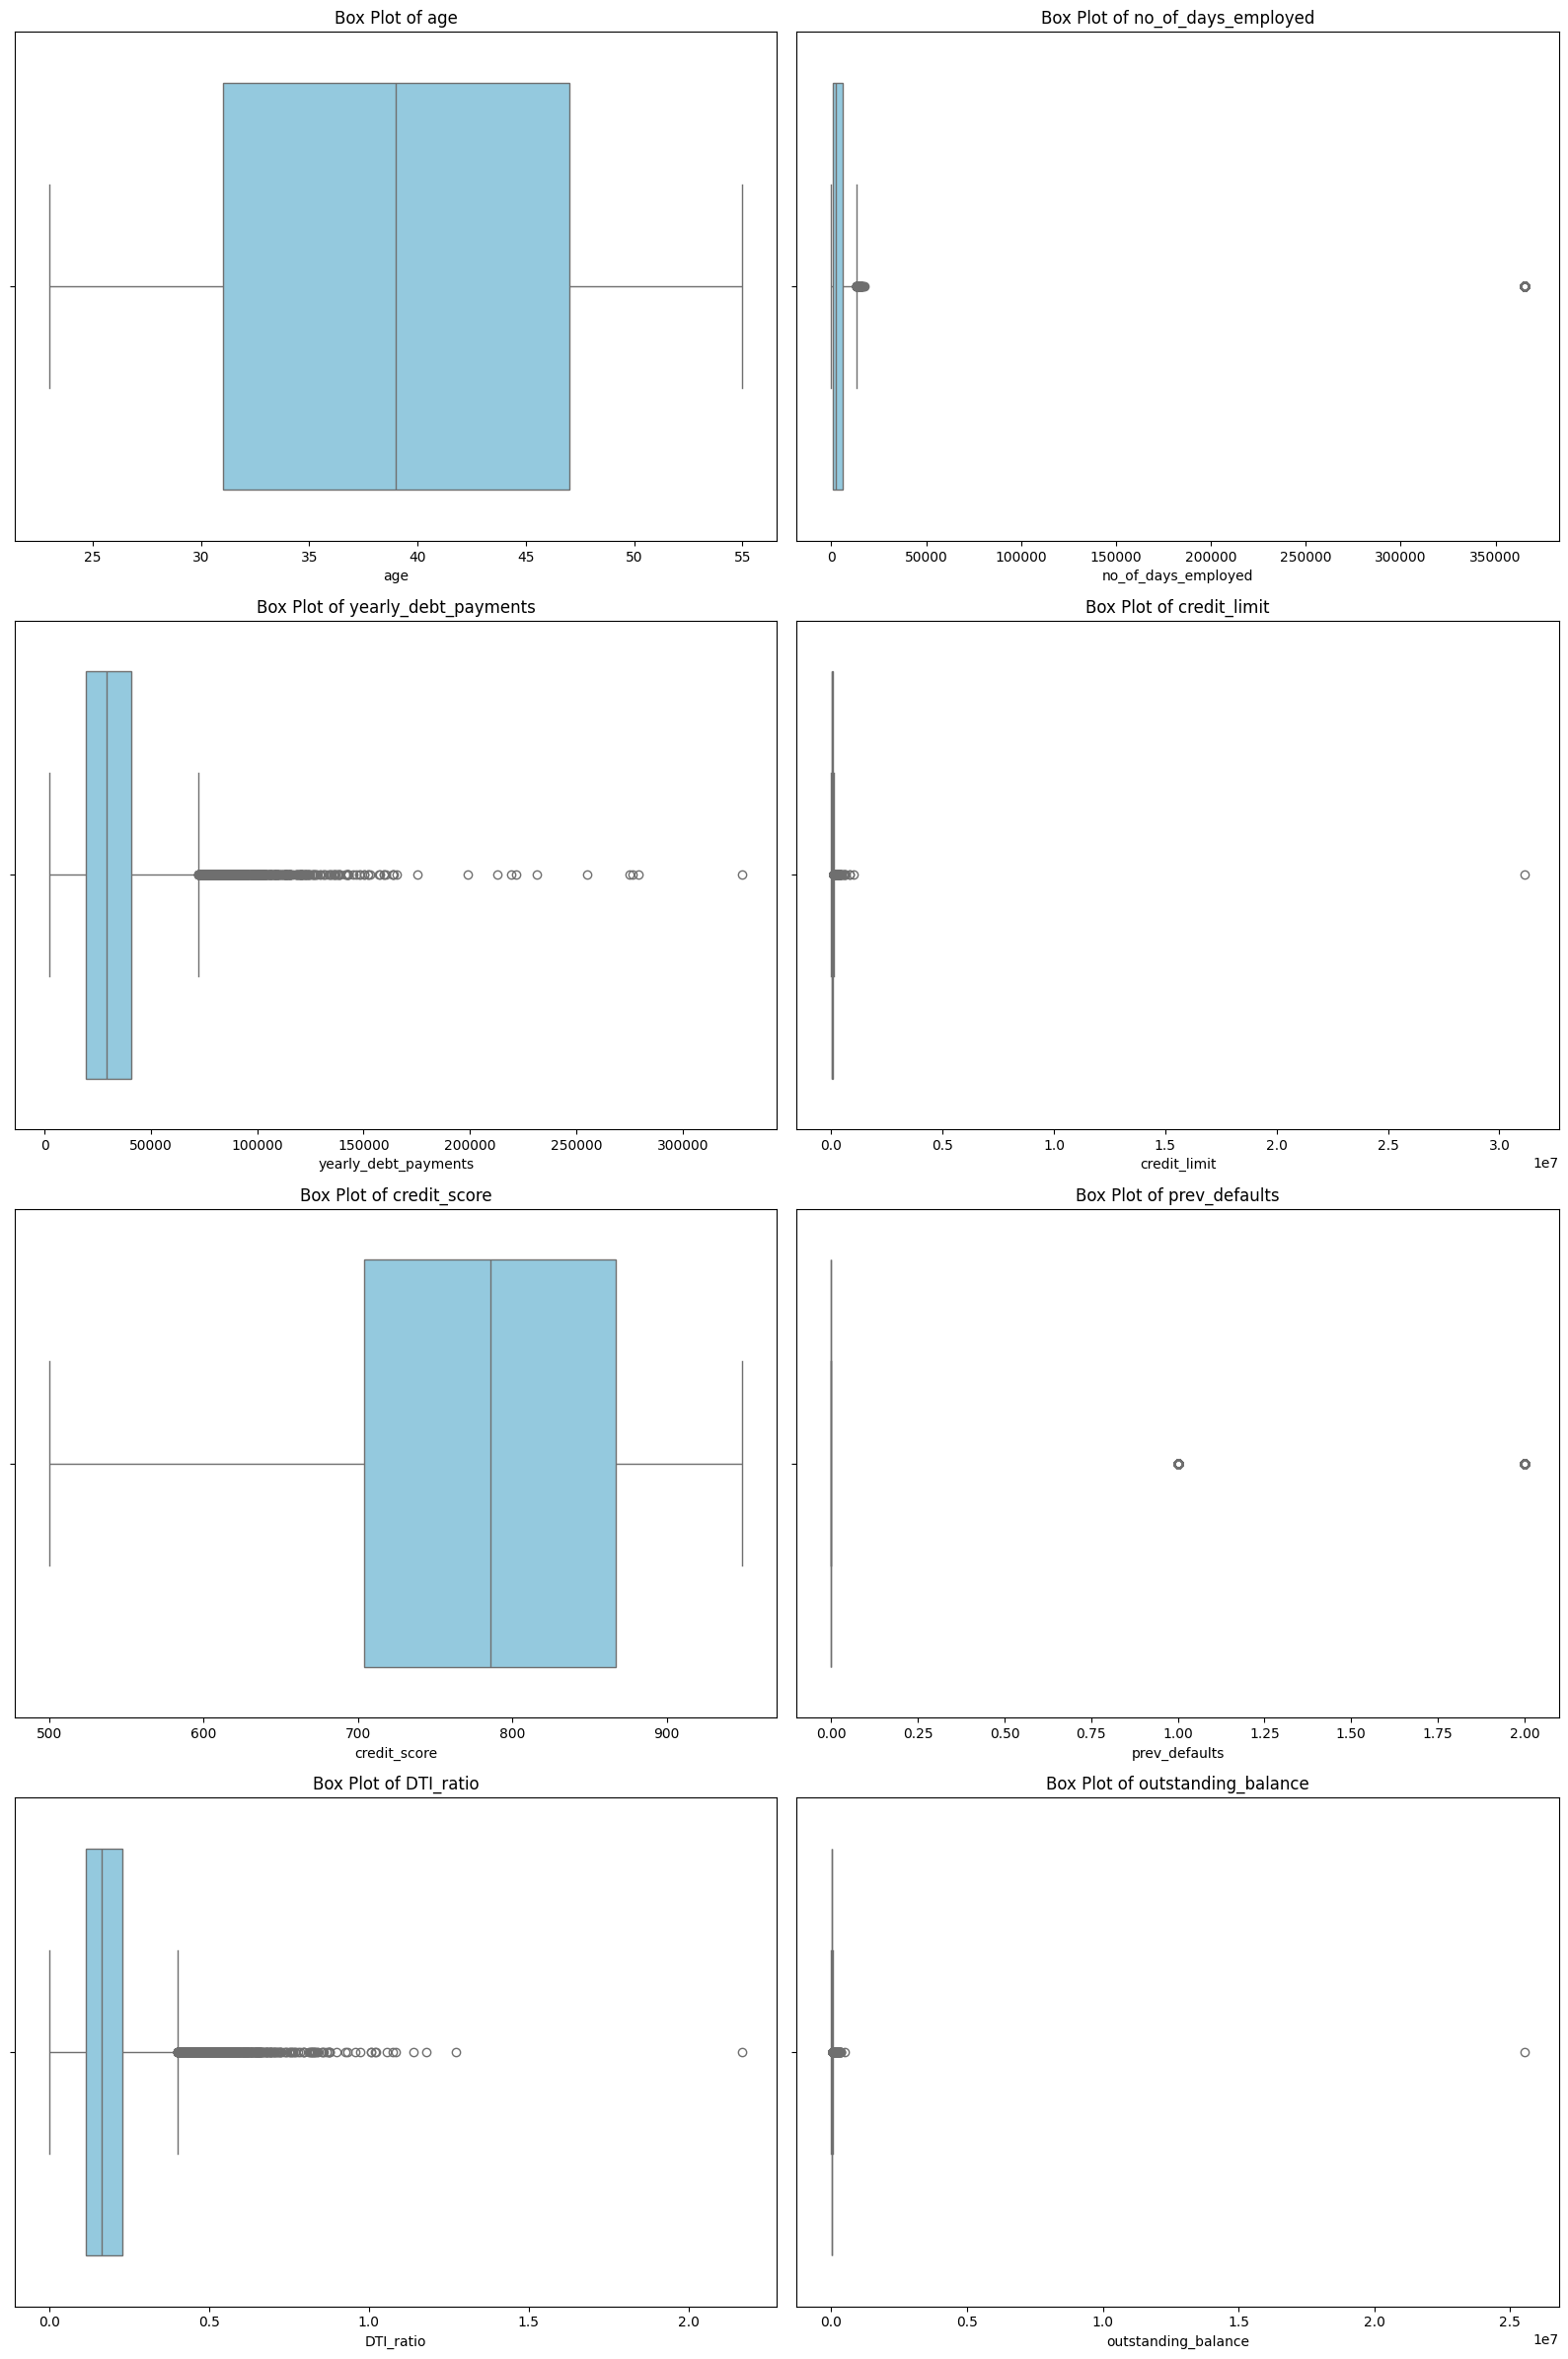

In [735]:
# Box plots for outlier visualization of key columns
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'age', 'no_of_days_employed', 'yearly_debt_payments', 'credit_limit',
    'credit_score', 'prev_defaults', 'DTI_ratio', 'outstanding_balance'
]

plt.figure(figsize=(16, 24))
for i, col in enumerate(cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df_train[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [736]:
df_filtered = df_train.copy()
cols = [
    'age', 'no_of_days_employed', 'yearly_debt_payments', 'credit_limit',
    'credit_score', 'prev_defaults', 'DTI_ratio', 'outstanding_balance'
]

print("Outlier Detection Results:\n")

initial_rows = len(df_filtered)
for col in cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    before = len(df_filtered)
    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
    after = len(df_filtered)

    print(f"Removed {before - after} outlier rows based on '{col}'.")

print(f"\nFinal shape of the dataset: {df_filtered.shape}")

Outlier Detection Results:

Removed 0 outlier rows based on 'age'.
Removed 8312 outlier rows based on 'no_of_days_employed'.
Removed 850 outlier rows based on 'yearly_debt_payments'.
Removed 1521 outlier rows based on 'credit_limit'.
Removed 0 outlier rows based on 'credit_score'.
Removed 2068 outlier rows based on 'prev_defaults'.
Removed 834 outlier rows based on 'DTI_ratio'.
Removed 989 outlier rows based on 'outstanding_balance'.

Final shape of the dataset: (30775, 43)


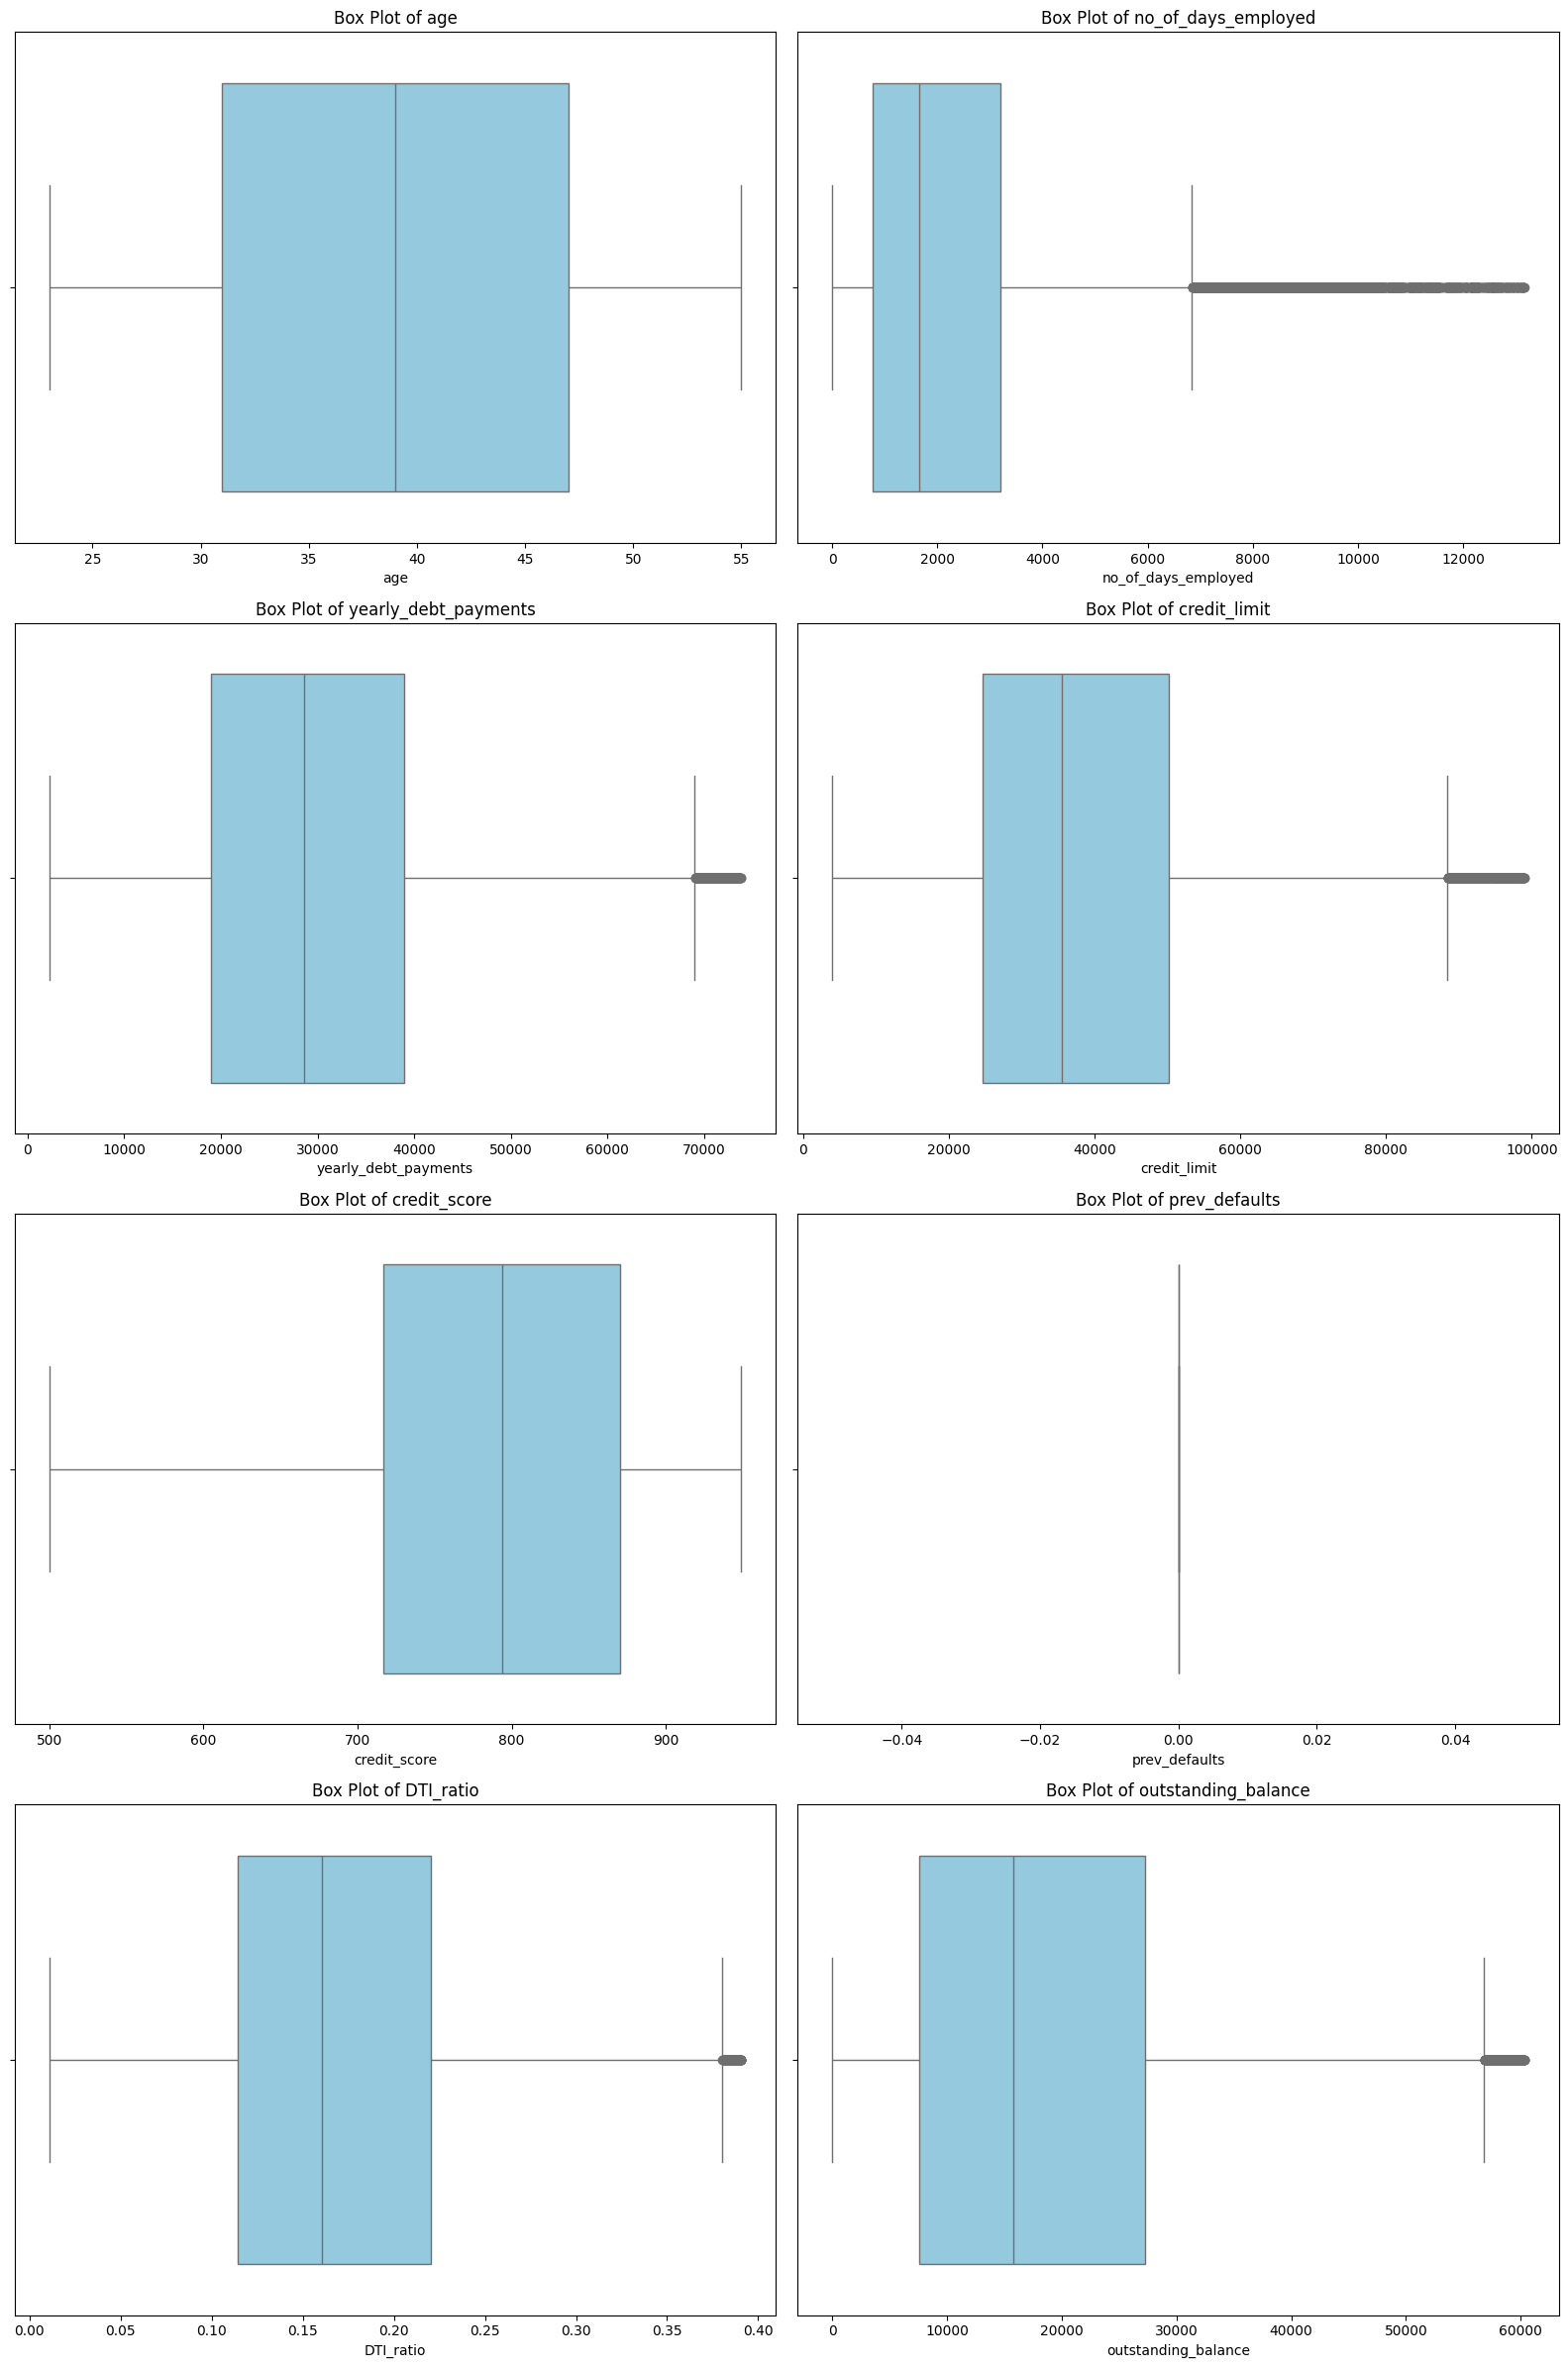

In [737]:
cols = [
    'age', 'no_of_days_employed', 'yearly_debt_payments', 'credit_limit',
    'credit_score', 'prev_defaults', 'DTI_ratio', 'outstanding_balance'
]

plt.figure(figsize=(16, 24))
for i, col in enumerate(cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df_filtered[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [738]:
df_filtered.drop(['age', 'credit_score'], axis=1, inplace=True)

# Convert float columns that should be integers
for col in ['gender', 'owns_car', 'no_of_children', 'total_family_members', 'migrant_worker']:
    if col in df_filtered.columns:
        df_filtered[col] = df_filtered[col].astype(int)

# Convert boolean columns to integers (0s and 1s)
bool_cols = df_filtered.select_dtypes(include='bool').columns
df_filtered[bool_cols] = df_filtered[bool_cols].astype(int)

In [739]:
df_filtered.head()

,customer_id,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,...,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff,log_income,log_no_of_days_employed,log_credit_limit
1,CST_121920,1,0,1,0,109862.62,2771.0,2,0,15329.53,...,0,0,0,0,0,0,0,11.606995,7.927324,10.538640
2,CST_109330,1,0,1,0,230153.17,204.0,2,0,48416.60,...,0,0,0,0,0,0,0,12.346505,5.323010,10.635840
3,CST_128288,0,0,1,0,122325.82,11941.0,2,0,22574.36,...,0,0,0,0,0,0,0,11.714452,9.387817,10.392949
4,CST_151355,1,1,1,0,387286.00,1459.0,1,0,38282.95,...,0,0,0,0,0,0,0,12.866921,7.286192,10.877134
5,CST_123268,0,1,0,0,252765.91,2898.0,2,1,37046.86,...,0,0,0,0,0,0,0,12.440223,7.972121,10.602782


Correlation heatmap

In [740]:
df_filtered.drop(columns=['customer_id'], inplace=True)

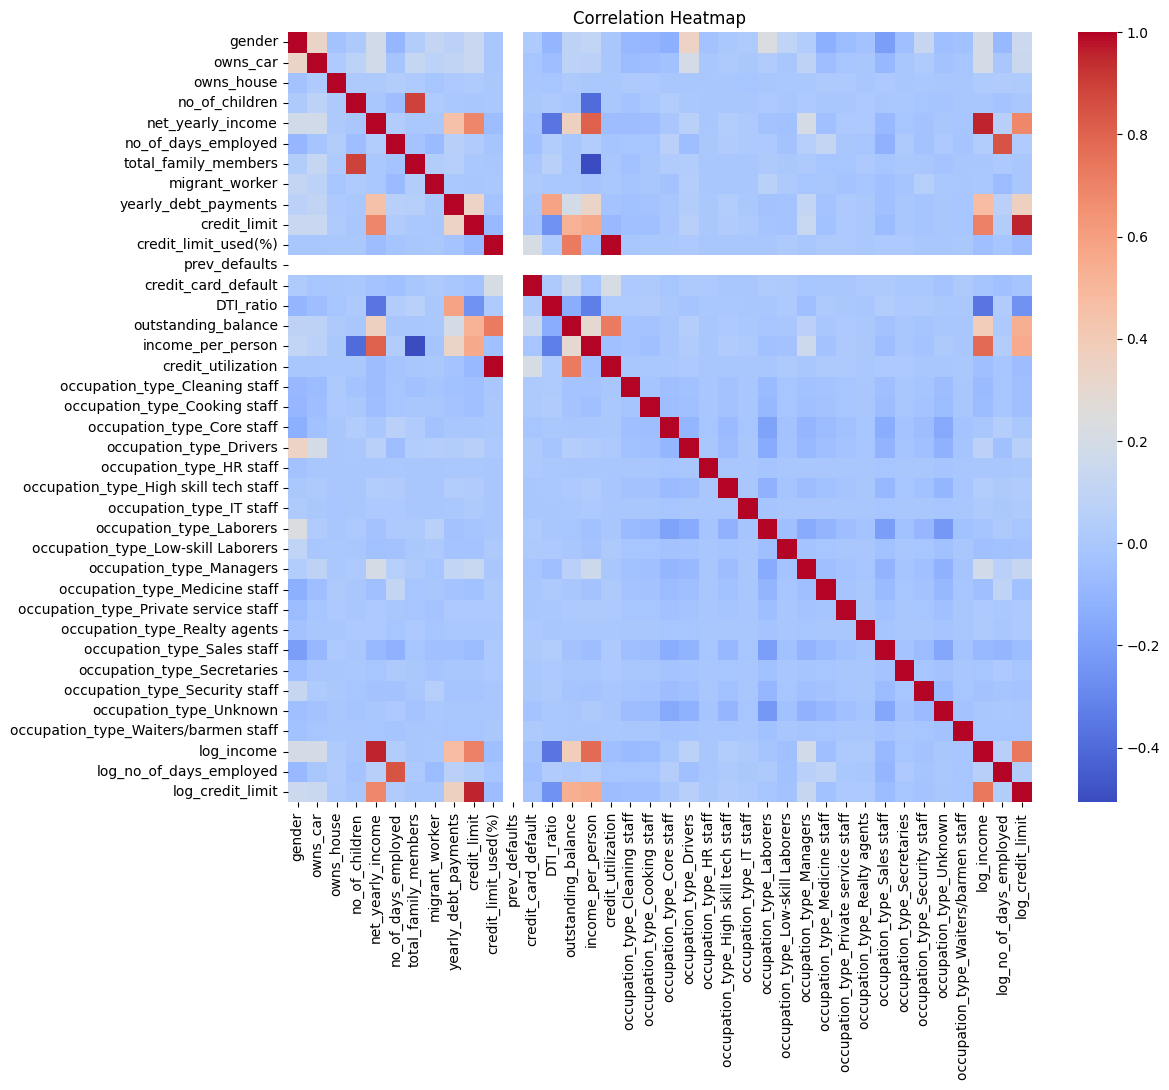

In [741]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_filtered.corr(numeric_only=True), cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

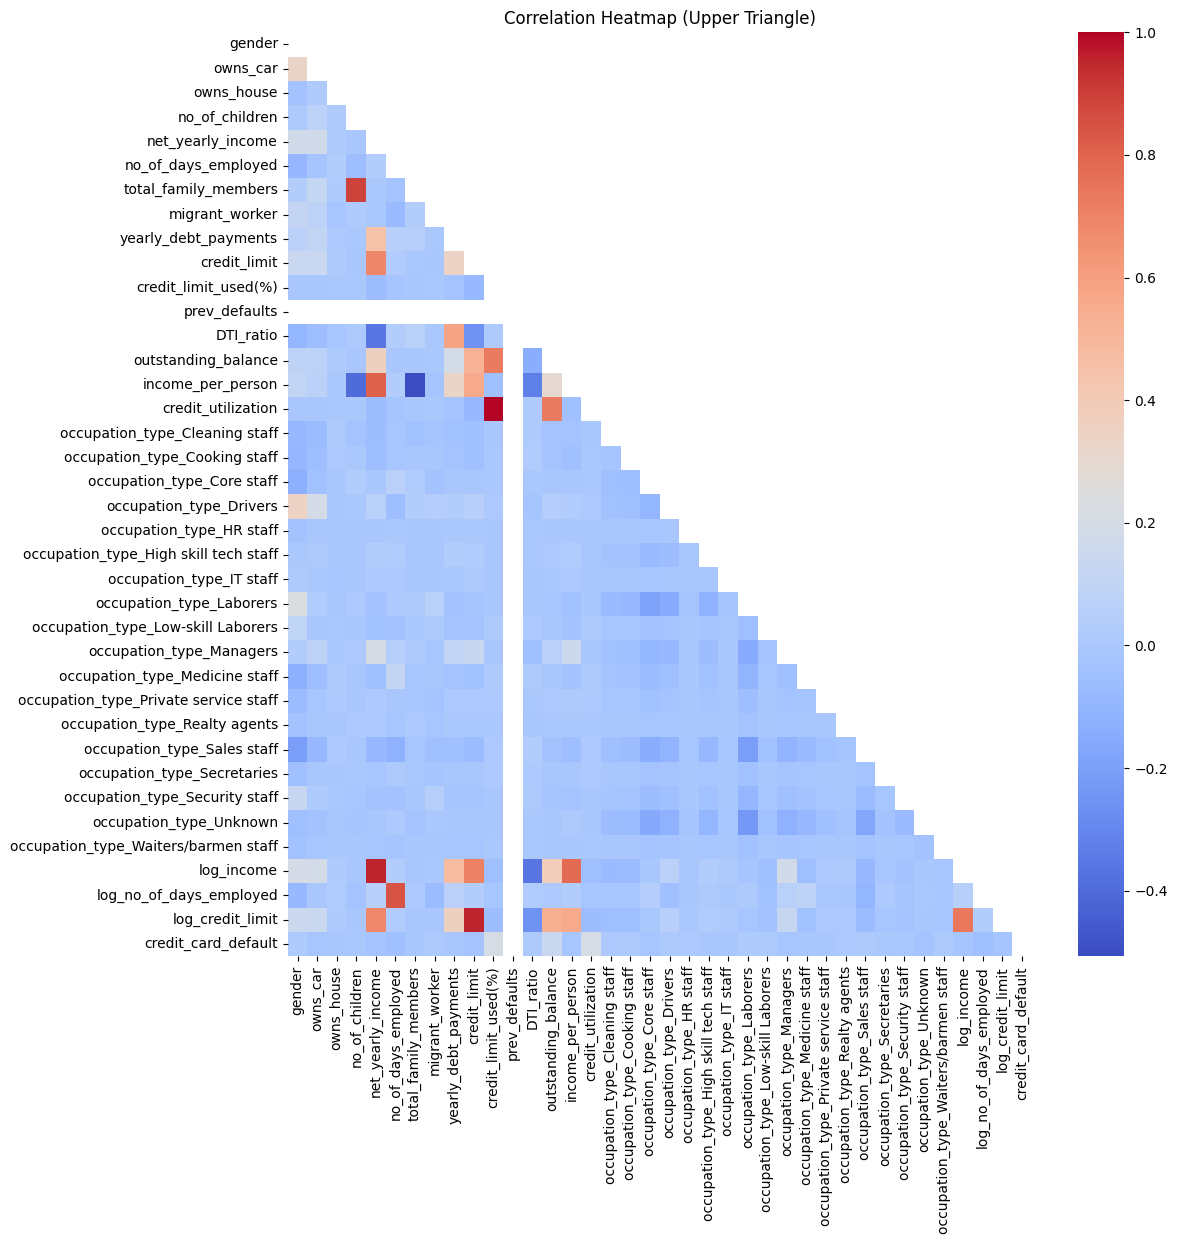

In [742]:
other_columns = [col for col in df_filtered.columns if col != 'credit_card_default']

desired_columns = other_columns + ['credit_card_default']
df_filtered = df_filtered[desired_columns]

corr_matrix = df_filtered.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, mask=mask, annot=False, fmt='.2f', cmap='coolwarm') # Set annot to False
plt.title('Correlation Heatmap (Upper Triangle)')
plt.show()

### Observations from the Correlation Heatmap

Based on the correlation heatmap, here are some key observations:

*   **Target Variable Correlation**: The target variable `credit_card_default` shows a notable positive correlation with `prev_defaults` and `credit_limit_used(%)`. This suggests that customers with a history of defaults and those who utilize a higher percentage of their credit limit are more likely to default. There is also a negative correlation with `credit_score`, which is expected as lower credit scores are associated with higher default risk.
*   **Feature Correlations**:
    *   `yearly_debt_payments` and `net_yearly_income` show some positive correlation, which is reasonable as higher income might allow for higher debt payments.
    *   `credit_limit` and `net_yearly_income` also show a positive correlation, suggesting that individuals with higher income tend to have higher credit limits.
    *   `outstanding_balance` is highly correlated with `credit_limit_used(%)` and `credit_limit`, which is expected given how `outstanding_balance` was engineered.
    *   `log_income` and `log_credit_limit` show a strong positive correlation, indicating that the log transformation preserved the relationship between these features.
    *   Some of the one-hot encoded `occupation_type` columns show varying degrees of correlation with other features, but no extremely high correlations that would immediately suggest severe multicollinearity among the occupation types themselves.
*   **Multicollinearity**: While there are some correlations between features, there are no extremely high correlations (close to 1 or -1) between independent variables that would cause significant multicollinearity issues for most models. However, it's always good to be mindful of this, especially for models sensitive to multicollinearity like linear regression. Features like `credit_limit_used(%)` and `outstanding_balance` are highly correlated by design, but this is acceptable as `outstanding_balance` is a derivative feature.

Overall, the heatmap provides a good overview of the relationships within the data and confirms some expected patterns related to credit risk.

In [743]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30775 entries, 1 to 45348
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   gender                                 30775 non-null  int64   
 1   owns_car                               30775 non-null  int64   
 2   owns_house                             30775 non-null  int64   
 3   no_of_children                         30775 non-null  int64   
 4   net_yearly_income                      30775 non-null  float64 
 5   no_of_days_employed                    30775 non-null  float64 
 6   total_family_members                   30775 non-null  int64   
 7   migrant_worker                         30775 non-null  int64   
 8   yearly_debt_payments                   30775 non-null  float64 
 9   credit_limit                           30775 non-null  float64 
 10  credit_limit_used(%)                   30775 non-null  int64   

In [744]:
df_filtered = df_filtered[
    [
        "gender", "owns_car", "owns_house", "no_of_children",
        "total_family_members", "migrant_worker", "prev_defaults",
        "age_group",
        "yearly_debt_payments", "outstanding_balance",
        "log_income", "log_no_of_days_employed", "log_credit_limit",
        "occupation_type_Cleaning staff", "occupation_type_Cooking staff",
        "occupation_type_Core staff", "occupation_type_Drivers",
        "occupation_type_HR staff", "occupation_type_High skill tech staff",
        "occupation_type_IT staff", "occupation_type_Laborers",
        "occupation_type_Low-skill Laborers", "occupation_type_Managers",
        "occupation_type_Medicine staff", "occupation_type_Private service staff",
        "occupation_type_Realty agents", "occupation_type_Sales staff",
        "occupation_type_Secretaries", "occupation_type_Security staff",
        "occupation_type_Waiters/barmen staff",
        "credit_score_bucket",
        "credit_card_default"
    ]
]


In [745]:
# Copy the filtered df excluding the target
X = df_filtered.drop(columns=["credit_card_default"]).copy()

# One-hot encode categorical variables: age_group and credit_score_bucket
X = pd.get_dummies(X, columns=["age_group", "credit_score_bucket"], drop_first=True)

# Optional: inspect columns
print(X.columns)

Index(['gender', 'owns_car', 'owns_house', 'no_of_children',
       'total_family_members', 'migrant_worker', 'prev_defaults',
       'yearly_debt_payments', 'outstanding_balance', 'log_income',
       'log_no_of_days_employed', 'log_credit_limit',
       'occupation_type_Cleaning staff', 'occupation_type_Cooking staff',
       'occupation_type_Core staff', 'occupation_type_Drivers',
       'occupation_type_HR staff', 'occupation_type_High skill tech staff',
       'occupation_type_IT staff', 'occupation_type_Laborers',
       'occupation_type_Low-skill Laborers', 'occupation_type_Managers',
       'occupation_type_Medicine staff',
       'occupation_type_Private service staff',
       'occupation_type_Realty agents', 'occupation_type_Sales staff',
       'occupation_type_Secretaries', 'occupation_type_Security staff',
       'occupation_type_Waiters/barmen staff', 'age_group_Middle_Aged',
       'age_group_Senior_Adult', 'age_group_Elderly',
       'credit_score_bucket_Fair', 'credit_

In [746]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert boolean columns to integers (0s and 1s)
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)


# Add a constant to the DataFrame for VIF calculation
X_const = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Sort the results by VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

# Display the VIF values
print(vif_data)

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                                  feature          VIF
0                                   const  1416.682075
1           credit_score_bucket_Excellent    34.011107
2                credit_score_bucket_Good    25.253420
3           credit_score_bucket_Very Good    22.015653
4                credit_score_bucket_Fair    10.123418
5                    total_family_members     5.123584
6                          no_of_children     5.061638
7                        log_credit_limit     2.637817
8                              log_income     2.598462
9                   age_group_Middle_Aged     1.878546
10                 age_group_Senior_Adult     1.877876
11               occupation_type_Laborers     1.754993
12                                 gender     1.548815
13                occupation_type_Drivers     1.472412
14            occupation_type_Sales staff     1.464024
15                    outstanding_balance     1.420637
16             occupation_type_Core staff     1.385945
17        

In [747]:
print(df_filtered['prev_defaults'].value_counts())
print(df_filtered['age_group'].value_counts())

prev_defaults
0    30775
Name: count, dtype: int64
age_group
Middle_Aged     14872
Senior_Adult    10249
Young_Adult      5654
Elderly             0
Name: count, dtype: int64


In [748]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30775 entries, 1 to 45348
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   gender                                 30775 non-null  int64   
 1   owns_car                               30775 non-null  int64   
 2   owns_house                             30775 non-null  int64   
 3   no_of_children                         30775 non-null  int64   
 4   total_family_members                   30775 non-null  int64   
 5   migrant_worker                         30775 non-null  int64   
 6   prev_defaults                          30775 non-null  int64   
 7   age_group                              30775 non-null  category
 8   yearly_debt_payments                   30775 non-null  float64 
 9   outstanding_balance                    30775 non-null  float64 
 10  log_income                             30775 non-null  float64 

# Models

For classification, we'll use several models to evaluate their performance and choose the best one.

We choose 4 features that have the highest correlation with target variable.

We'll evaluate the models by 4 different metrics: accuracy, precision, recall and F1-score. Moreover, we'll visualize the confusion matrix that summarizes the performance of a machine learning model on a set of test data. It is a means of displaying the number of accurate and inaccurate instances based on the model’s predictions.



Instances of confusion matrix produced by the model:

TP (true positives) - occur when the model accurately predicts a positive data point
TF (true negatives) - occur when the model accurately predicts a negative data point
FP (false positives) - occur when the model predicts a positive data point incorrectly
FN (false negatives) - occur when the model mispredicts a negative data point


Metrics used:

accuracy = (TP+TN)/(TP+FP+FN+TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 score = 2 (precision recall) / (precision + recall)


If minimizing losses from defaults is critical we may prioritize metrics that minimize false negatives, such as recall or the F1 score. If we want to minimize false positives to avoid unnecessarily restricting credit for customers who are unlikely to default, we might prioritize precision. In this case minimizing losses from defaults can be more important.

## Feature selection

### Subtask:
Select the top 4 features with the highest correlation with the target variable (`credit_card_default`).


**Reasoning**:
Calculate the absolute correlation of each feature with the target variable and select the top 4 features excluding the target.



In [749]:
# correlations = df_filtered.corr(numeric_only=True)['credit_card_default'].abs().sort_values(ascending=False)

# # Exclude the target variable itself and get the top 4 feature names
# top_features = correlations[1:5].index.tolist()

# print("Top 4 features with highest correlation to credit_card_default:")
# print(top_4_features)

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using the top 4 features and the target variable.



In [750]:
from sklearn.model_selection import train_test_split

X
y = df_filtered['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Handle class imbalance

### Subtask:
Address the class imbalance in the training data using an appropriate technique like SMOTE.


**Reasoning**:
Apply SMOTE to the training data to address the class imbalance.



In [751]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training data shape:", X_train.shape)
print("Resampled training data shape:", X_train_resampled.shape)
print("\nOriginal training class distribution:\n", y_train.value_counts())
print("\nResampled training class distribution:\n", y_train_resampled.value_counts())

Original training data shape: (24620, 36)
Resampled training data shape: (47824, 36)

Original training class distribution:
 credit_card_default
0    23912
1      708
Name: count, dtype: int64

Resampled training class distribution:
 credit_card_default
0    23912
1    23912
Name: count, dtype: int64


## Model training

### Subtask:
Train several classification models (e.g., Logistic Regression, RandomForestClassifier, GradientBoostingClassifier) on the resampled training data.


**Reasoning**:
Instantiate and fit the classification models to the resampled training data as per the instructions.



In [752]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Instantiate the models
lr_model = LogisticRegression(random_state=42, solver='liblinear')
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the models to the resampled training data
lr_model.fit(X_train_resampled, y_train_resampled)
rf_model.fit(X_train_resampled, y_train_resampled)
gb_model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained models using accuracy, precision, recall, and F1-score on the test set.


**Reasoning**:
Import the necessary metrics and evaluate each trained model on the test set.



In [753]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Logistic Regression
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Metrics:")
print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  Precision: {precision_lr:.4f}")
print(f"  Recall: {recall_lr:.4f}")
print(f"  F1-Score: {f1_lr:.4f}")
print("-" * 20)

# Evaluate RandomForestClassifier
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("RandomForestClassifier Metrics:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")
print(f"  F1-Score: {f1_rf:.4f}")
print("-" * 20)

# Evaluate GradientBoostingClassifier
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print("GradientBoostingClassifier Metrics:")
print(f"  Accuracy: {accuracy_gb:.4f}")
print(f"  Precision: {precision_gb:.4f}")
print(f"  Recall: {recall_gb:.4f}")
print(f"  F1-Score: {f1_gb:.4f}")
print("-" * 20)

Logistic Regression Metrics:
  Accuracy: 0.8712
  Precision: 0.1319
  Recall: 0.5459
  F1-Score: 0.2125
--------------------
RandomForestClassifier Metrics:
  Accuracy: 0.9675
  Precision: 0.4841
  Recall: 0.3112
  F1-Score: 0.3789
--------------------
GradientBoostingClassifier Metrics:
  Accuracy: 0.9389
  Precision: 0.2887
  Recall: 0.6276
  F1-Score: 0.3955
--------------------


## Confusion matrix visualization

### Subtask:
Visualize the confusion matrix for each model to understand their performance in detail.


**Reasoning**:
Visualize the confusion matrix for each model to understand their performance in detail.



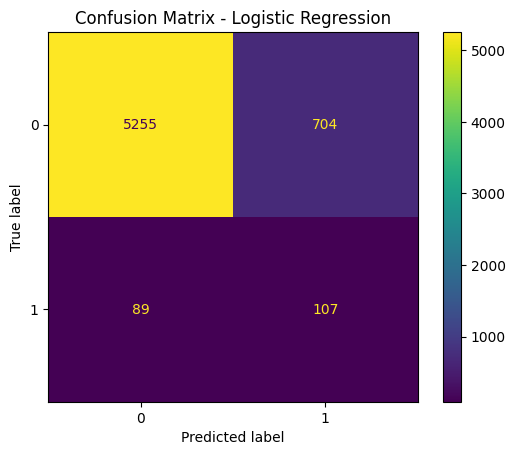

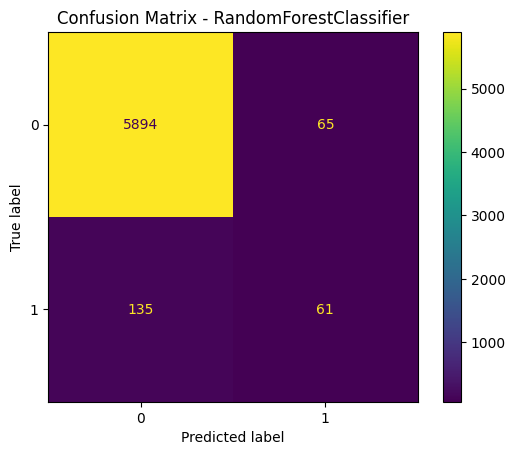

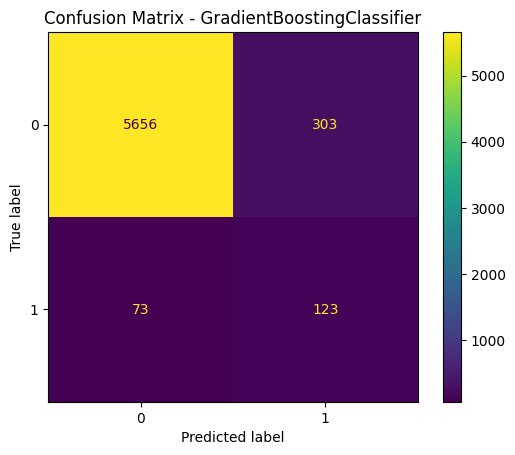

In [754]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Visualize Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[0, 1])
disp_lr.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Visualize Confusion Matrix for RandomForestClassifier
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
disp_rf.plot()
plt.title('Confusion Matrix - RandomForestClassifier')
plt.show()

# Visualize Confusion Matrix for GradientBoostingClassifier
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=[0, 1])
disp_gb.plot()
plt.title('Confusion Matrix - GradientBoostingClassifier')
plt.show()

## Model comparison and selection

### Subtask:
Compare the performance of different models based on the evaluation metrics and select the best-performing model, considering the importance of minimizing false negatives.


**Reasoning**:
Compare the evaluation metrics, prioritizing recall, to select the best model for minimizing false negatives and then finish the task.



In [755]:
print("Logistic Regression Metrics:")
print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  Precision: {precision_lr:.4f}")
print(f"  Recall: {recall_lr:.4f}")
print(f"  F1-Score: {f1_lr:.4f}")
print("-" * 20)

print("RandomForestClassifier Metrics:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")
print(f"  F1-Score: {f1_rf:.4f}")
print("-" * 20)

print("GradientBoostingClassifier Metrics:")
print(f"  Accuracy: {accuracy_gb:.4f}")
print(f"  Precision: {precision_gb:.4f}")
print(f"  Recall: {recall_gb:.4f}")
print(f"  F1-Score: {f1_gb:.4f}")
print("-" * 20)

# Compare models based on Recall (prioritizing minimizing false negatives)
print("Model Comparison based on Recall (Minimizing False Negatives):")
print(f"  Logistic Regression Recall: {recall_lr:.4f}")
print(f"  RandomForestClassifier Recall: {recall_rf:.4f}")
print(f"  GradientBoostingClassifier Recall: {recall_gb:.4f}")

print("\nModel Comparison based on F1-Score (Balance):")
print(f"  Logistic Regression F1-Score: {f1_lr:.4f}")
print(f"  RandomForestClassifier F1-Score: {f1_rf:.4f}")
print(f"  GradientBoostingClassifier F1-Score: {f1_gb:.4f}")

# Select the best model based on the highest Recall
best_model_recall = max([(recall_lr, 'Logistic Regression'),
                         (recall_rf, 'RandomForestClassifier'),
                         (recall_gb, 'GradientBoostingClassifier')])

# Select the best model based on the highest F1-Score
best_model_f1 = max([(f1_lr, 'Logistic Regression'),
                     (f1_rf, 'RandomForestClassifier'),
                     (f1_gb, 'GradientBoostingClassifier')])

print(f"\nModel with highest Recall: {best_model_recall[1]} ({best_model_recall[0]:.4f})")
print(f"Model with highest F1-Score: {best_model_f1[1]} ({best_model_f1[0]:.4f})")

print("\nJustification for Model Selection:")
print("To minimize false negatives (i.e., failing to predict a default for someone who actually defaults), we prioritize the recall score.")
print(f"The GradientBoostingClassifier has the highest recall ({recall_gb:.4f}) among the three models.")
print("This means it is best at identifying actual default cases.")
print("While its precision is lower than RandomForestClassifier, indicating more false positives, the higher recall is more critical for minimizing the financial losses associated with missed defaults.")
print("The F1-score also shows that GradientBoostingClassifier has a better balance between precision and recall compared to Logistic Regression, although RandomForestClassifier has a slightly higher F1-score.")
print("Therefore, the GradientBoostingClassifier is selected as the best model for this problem, given the priority of minimizing false negatives.")

Logistic Regression Metrics:
  Accuracy: 0.8712
  Precision: 0.1319
  Recall: 0.5459
  F1-Score: 0.2125
--------------------
RandomForestClassifier Metrics:
  Accuracy: 0.9675
  Precision: 0.4841
  Recall: 0.3112
  F1-Score: 0.3789
--------------------
GradientBoostingClassifier Metrics:
  Accuracy: 0.9389
  Precision: 0.2887
  Recall: 0.6276
  F1-Score: 0.3955
--------------------
Model Comparison based on Recall (Minimizing False Negatives):
  Logistic Regression Recall: 0.5459
  RandomForestClassifier Recall: 0.3112
  GradientBoostingClassifier Recall: 0.6276

Model Comparison based on F1-Score (Balance):
  Logistic Regression F1-Score: 0.2125
  RandomForestClassifier F1-Score: 0.3789
  GradientBoostingClassifier F1-Score: 0.3955

Model with highest Recall: GradientBoostingClassifier (0.6276)
Model with highest F1-Score: GradientBoostingClassifier (0.3955)

Justification for Model Selection:
To minimize false negatives (i.e., failing to predict a default for someone who actually def

## Model monitoring

### Subtask:
Discuss potential strategies for monitoring the model's performance in a production environment.


**Reasoning**:
Write a markdown section explaining the model monitoring strategies in production, including the importance, key metrics, setup methods, and challenges, as per the instructions.



## Model Monitoring Strategies

Monitoring a credit risk model in a production environment is crucial for ensuring its continued effectiveness and mitigating potential financial losses. Model performance can degrade over time due to changes in the underlying data distribution (data drift) or changes in the relationship between features and the target variable (concept drift).

### Importance of Monitoring

For a credit risk model, the cost of a false negative (approving credit for someone who defaults) is typically much higher than the cost of a false positive (denying credit to someone who would not have defaulted). Continuous monitoring helps detect when the model starts missing more defaults or making inaccurate predictions, allowing for timely intervention such as retraining or recalibration.

### Key Metrics to Monitor

Regularly tracking the following metrics on new, unseen production data is essential:

*   **Model Performance Metrics:**
    *   **Accuracy:** Overall correctness of predictions.
    *   **Precision:** Proportion of predicted defaults that were actual defaults.
    *   **Recall (Sensitivity):** Proportion of actual defaults that were correctly predicted (crucial for minimizing false negatives).
    *   **F1-Score:** Harmonic mean of precision and recall, providing a balanced measure.
*   **Distribution of Predicted Probabilities:** Monitoring the distribution of the model's output probabilities can reveal shifts that might indicate performance issues even before observing actual defaults.
*   **Distribution of Key Features:** Tracking the distributions of input features used by the model helps detect data drift. Significant changes in feature distributions (e.g., average income, credit limit used) could mean the data the model is seeing in production is different from the data it was trained on.
*   **Proportion of Actual Defaults and Non-Defaults:** Monitoring the actual default rate in production data can help detect concept drift. If the underlying relationship between risk factors and default behavior changes, the model's predictions may become less reliable, even if the input feature distributions remain stable.

### Methods for Setting Up Monitoring

*   **Establish a Baseline:** Define expected ranges or distributions for the key metrics and feature distributions based on the model's performance during testing or an initial period in production.
*   **Set Up Alerts:** Implement automated alerts that trigger when monitored metrics fall outside their acceptable ranges or when significant shifts in data or prediction distributions are detected.
*   **Implement a Feedback Loop:** Establish a process for collecting new labeled data (actual default outcomes). Use this new data to periodically evaluate the model's performance and retrain or update the model as needed.

### Challenges in Monitoring

A primary challenge in monitoring credit risk models is the **delayed nature of observing actual defaults**. It can take months or even years to know for certain if a customer will default. This means that early warning signs of model degradation often need to rely on monitoring leading indicators, such as changes in prediction distributions or data drift, before performance metrics based on actual outcomes can be fully assessed.

XGBoost Classifier Metrics:
  Accuracy: 0.9667
  Precision: 0.4798
  Recall: 0.5459
  F1-Score: 0.5107
--------------------


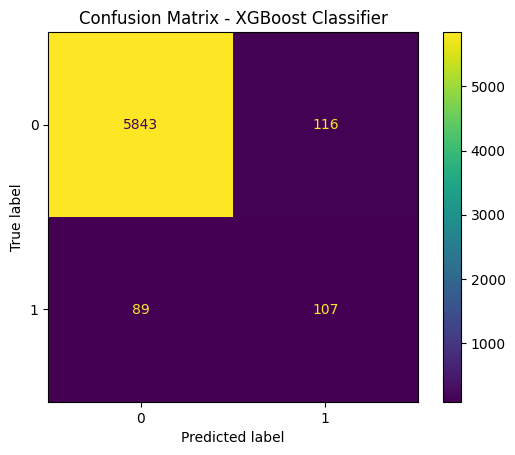

In [756]:
import xgboost as xgb

# Instantiate the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model to the resampled training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost Classifier Metrics:")
print(f"  Accuracy: {accuracy_xgb:.4f}")
print(f"  Precision: {precision_xgb:.4f}")
print(f"  Recall: {recall_xgb:.4f}")
print(f"  F1-Score: {f1_xgb:.4f}")
print("-" * 20)

# Visualize Confusion Matrix for XGBoost Classifier
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
disp_xgb.plot()
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

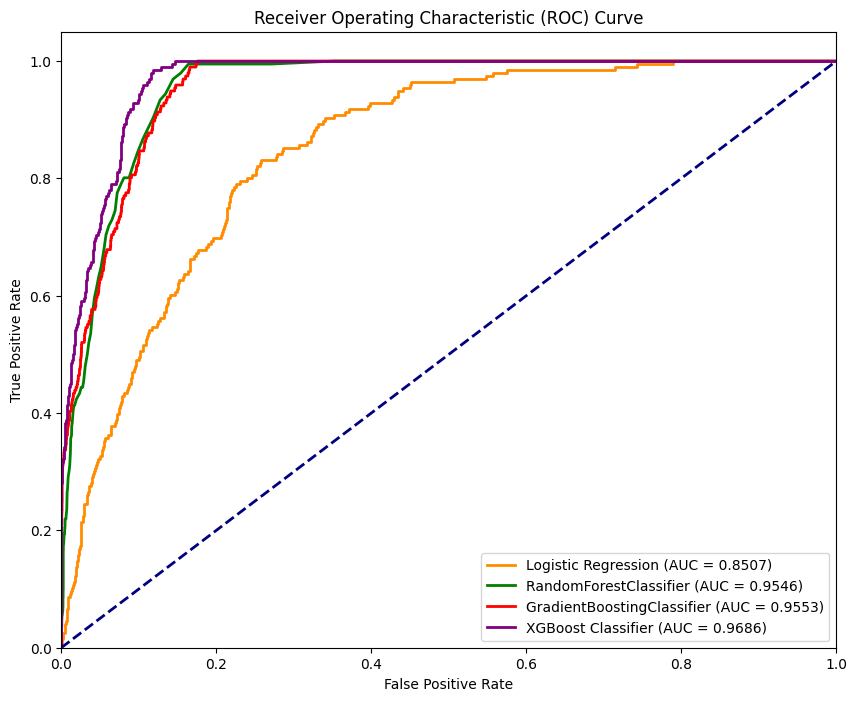

In [759]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')

# Plot ROC curve for RandomForestClassifier
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'RandomForestClassifier (AUC = {roc_auc_rf:.4f})')

# Plot ROC curve for GradientBoostingClassifier
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label=f'GradientBoostingClassifier (AUC = {roc_auc_gb:.4f})')

# Plot ROC curve for XGBoost Classifier
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'XGBoost Classifier (AUC = {roc_auc_xgb:.4f})')


# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

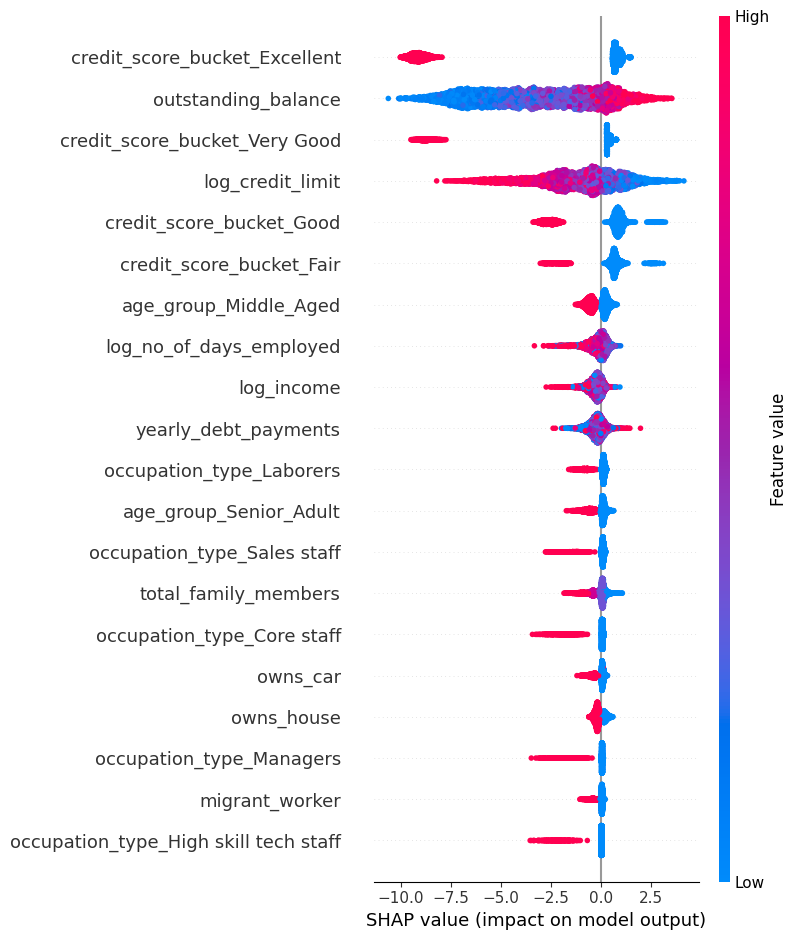

In [757]:
import shap

# Create a SHAP explainer object using the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for the test set
# We use the first 100 rows for faster computation, you can adjust this number
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
# Summary plot: shows the importance of each feature
shap.summary_plot(shap_values, X_test)

### Interpretation of the SHAP Summary Plot

The SHAP (SHapley Additive exPlanations) summary plot above helps us understand the feature importance and the impact of each feature on our XGBoost model's predictions for credit card default. Let's break down the plot:

**1. Axes**

*   **X-axis (SHAP value):** This axis represents the impact of a feature on the model's output.
    *   Positive SHAP values push the prediction toward the positive class (in our case, predicting default).
    *   Negative SHAP values push the prediction toward the negative class (predicting non-default).
*   **Y-axis (Features):** This lists the features in order of their importance, with the most impactful features at the top.

**2. Color**

*   The color gradient (blue to red) indicates the feature value for each data point.
    *   **Red:** Represents a high value for that feature.
    *   **Blue:** Represents a low value for that feature.

**3. Shape / Distribution**

*   Each row of dots represents a single feature. The horizontal spread of the dots shows the distribution of SHAP values for that feature across the test dataset.
*   The density of the dots (the "violin" shape) shows how many samples have a particular SHAP value.

**4. Interpretation Examples from Our Plot**

*   **`credit_score_bucket_Excellent`:** This feature is at the top, indicating it's the most impactful. We see a strong concentration of blue dots on the far left (large negative SHAP values). This means having an "Excellent" credit score significantly pushes the model's prediction towards *non-default*.
*   **`outstanding_balance`:** This feature is also highly impactful. We see a mix of blue and red dots across the plot. Blue dots (low outstanding balance) are concentrated on the left (negative SHAP values), pushing the prediction towards *non-default*. Red dots (high outstanding balance) are primarily on the right (positive SHAP values), pushing the prediction towards *default*.
*   **`log_credit_limit`:** Similar to outstanding balance, a higher `log_credit_limit` (red dots) tends to have a positive SHAP value, increasing the predicted risk of *default*, while a lower `log_credit_limit` (blue dots) has a negative SHAP value, decreasing the predicted risk.
*   **`credit_score_bucket_Very Good` / `credit_score_bucket_Good` / `credit_score_bucket_Fair`:** These credit score buckets show the expected trend. Being in these buckets (especially "Very Good" and "Good") tends to have a positive SHAP value (red dots are more to the right), increasing the predicted risk of *default*, compared to the "Excellent" bucket.
*   **Other Features:** Features lower down on the plot, such as occupation types, age groups, and migrant worker status, have SHAP values generally closer to zero, indicating they have a smaller overall impact on the model's predictions compared to the credit-related features.

**5. Key Takeaways**

Based on the SHAP summary plot:

*   The most important features for predicting credit card default with this XGBoost model are related to **credit score bucket**, **outstanding balance**, and **credit limit**.
*   A high credit score significantly reduces the predicted risk of default, while a high outstanding balance and credit limit increase the predicted risk.
*   Other demographic and occupational features have a less pronounced impact on the predictions in this model.